<img src='https://www.met.no/om-oss/logo/_/image/73f29cde-219f-487b-809c-9cdd61032c78:2efc46ce776f5f5337c4b0156ae0cbaa3b6bf6fe/width-768/Met_RGB_Horisontal.jpg' width=200 align=right>
<img src='https://raw.githubusercontent.com/norkyst/norkyst-logo/refs/heads/main/png/horizontal_35_91_100.png' width=200 align=right>

# __UNDER CONSTRUCTION__
# About the model
Norkyst (version 3) is a sea ocean circulation model and is a collaboration project between the Institute of Marine Research and the Norwegian Meteorological Institute. The model spans over the North and Norwegian sea, serving as the main forecast tool for ocean forecasting at the coast of Norway. The model utilizes the high-resolution Regional Ocean Modelling System (ROMS), featuring an 800-meter horizontal resolution and 40 vertical layers. Consequently, the data from analysis runs can be used in forecasting sea surface temperatures and ocean currents, as well as support applications such as Search-and-Rescue or oil spill preparedness modelling.

The new version of Norkyst (v3) includes a ten year long hindcast and operational runs. Hindcast can be useful to see the ocean dynamics of the Norwegian coast over time, whereas the operational outputs contribute to forecasting. Norkyst version 3 also includes a two-way nested 160 m resolution sub-domains for Oslofjorden and Sulafjorden.
The main differences of Norkyst version 3 compared to the previous is an extended domain, updated bathymetry and landmask, improved numerics and atmospheric forcing, increased number of vertical layers and a more realistic distribution of rivers along the coast. 

__Techincal details__
The forecasting system is based on the Regional Ocean Modeling System (ROMS), with a sub-kilometric horizontal resolution of 800m to resolve mesoscale features. The new Norkyst model system (version 3) has 40 vertical layers, where we have prioritized high resolution in the uppermost layers due to the importance of near-surface flows for operational services. Atmospheric forcing is provided by hourly surface fields from AROME-MetCoOP and tidal forcing from TPXO. Lateral boundary conditions are provided by Topaz and the CMEMS Baltic sea model for temperature and salinity in the Kattegat area. The volume fluxes for all the Norwegian rivers are estimated from daily measurements from the Norwegian Water Resources and Energy Directorate (NVE) where total runoffs for 69 Norwegian coastal regions are distributed to 1760 main rivers according to their upstream area. Runoffs from Swedish and Danish rivers are retrieved from the European hydrological predictions for the environment (E-HYPE) provided by the Swedish Meteorological and Hydrological Institute (SMHI).

__Further reading:__

* The Norwegian Meteorological Institute (MET): https://ocean.met.no/models#norkyst, https://ocean.met.no/models#norkyst_hindcast
* Institute of Marine Research (IMR): https://www.hi.no/en/hi/forskning/research-data-1/models/ocean-models

### Operational vs Hindcast 

Data from Norkyst v3 is available on METS's THREDDS server, both operational data and the hindcast. 

Norkyst's v3 hindcast contains data from 2012-2024. It represents the past and can be useful if you want to know more about the climatology of an area. Operational data is produced for forecasts. The model is run operationally daily with a X lead time. 
This essentially mean that you can find data from 2012 and up to today (and some time into the future) at all times. The datasets are mostly similar, with some exceptions. 

* __Hindcast__: output files are provided for both types of vertical coordinates: S-levels and Z-levels, and contains the full depth. 
* __Operational__: output files are provided only for Z-levels, and only the upper 350 m. 

Both hindcast and operational have hourly time steps. Hindcast files are daily, so to analyze a longer period of time you have to open multiple files and merge them, or use an aggregated file (however these are quite heavy on the memory usage).

### Model grid, resolution and variables

The horizontal resolution is 800 m, while the vertical has a dynamic resolution of 40 layers with the higher resolution near the surface. In the horizontal the grid spacing is constant, whereas in the vertical it is not. In the un-processed files we have a vertical S-coordinate which follow the bottom topography, allowing for higher resolution near the surface where the action is. This means that the thickness of the vertical layers may vary in the horizontal. However, if you're using the Z-depth files, the values of the S-level files has been interpolated to given depths in meters, and are easier to work with for most purposes. 

The model utilizes a staggered grid, such that the different variables are defined on different points within the grid. The grid itself is (Y, X) coordinates, such that a given latitude/longitude is lat(Y,X) and lon(Y, X).

## Python requirements

This series of notebooks will provide guidlines on how to work with Norkyst data. Our most important tool will be Python and Python packages. To open datasets we will use xArray. This allows us to easily handle the large netCDF files. xArray has many built in functions for netCDF files, both for handling, processing and visualization. 

For our purposes we will make use of matplotlib for plotting, cmocean for colormaps specified for oceanography, numpy for computations and cartopy for maps. These are well documented packages, for further reading see the links below. We will from time to time also need more niche Python packages such as xroms, roppy, gsw, windrose and metpy. Their purpose will become clear in the further example notebooks. 

* Cartopy: https://scitools.org.uk/cartopy/docs/latest/
* cmocoean:https://matplotlib.org/cmocean/
* Matplotlib: https://matplotlib.org/stable/users/index
* NumPy: https://numpy.org/doc/stable/user/index.html#user
* Xarray: https://docs.xarray.dev/en/latest/index.html


In [13]:
import xarray as xr
import matplotlib.pyplot as plt

## Accessing the data

Data can be found at: https://thredds.met.no/thredds/catalog.html

Norkyst v3 operational data is under the 'Ocean and Ice' folder -> 'met.no ROMS NorKyst v3 coastal ocean forecasting system (2024-) preoperational/'.
Locate wanted file and click on it. We will use OPENDAP url to read in the data. When you click on the hyperlink next to 'OPENDAP' you will see a 'DATA URL' on the top. Copy this, and paste into your code as shown below.


In [14]:
path = 'https://thredds.met.no/thredds/dodsC/fou-hi/norkystv3_800m_m00_be' # DATA URL THREDDS


ds = xr.open_dataset(path) # Opening and reading the file to an Xarray DataSet object

In [15]:
# Nice overview of the dataset, including interactive drop-down menu
ds

<xarray.Dataset>
Dimensions:                  (X: 2747, Y: 1148, depth: 15, time: 10967)
Coordinates:
  * X                        (X) int32 0 800 1600 ... 2195200 2196000 2196800
  * Y                        (Y) int32 0 800 1600 2400 ... 916000 916800 917600
  * depth                    (depth) float64 0.0 1.0 2.0 ... 100.0 200.0 300.0
  * time                     (time) datetime64[ns] 2024-01-01 ... 2025-04-07
    lon                      (Y, X) float64 ...
    lat                      (Y, X) float64 ...
Data variables:
    projection_stere         int32 ...
    forecast_reference_time  float64 ...
    h                        (Y, X) float64 ...
    zeta                     (time, Y, X) float32 ...
    u_eastward               (time, depth, Y, X) float32 ...
    v_northward              (time, depth, Y, X) float32 ...
    w                        (time, depth, Y, X) float32 ...
    temperature              (time, depth, Y, X) float32 ...
    salinity                 (time, depth, Y, X) float32 ...
    AKs                      (time, depth, Y, X) float32 ...
    Uwind_eastward           (time, Y, X) float32 ...
    Vwind_northward          (time, Y, X) float32 ...
Attributes: (12/37)
    id:                         b51c9fe0-8eb4-4ef5-88f2-5c043fe8cf71
    naming_authority:           no.met
    operational_status:         Operational
    iso_topic_category:         oceans
    activity_type:              Numerical Simulation
    keywords_vocabulary:        GCMDSK:GCMD Science Keywords:https://gcmd.ear...
    ...                         ...
    dataset_production_status:  In Work
    license:                    https://spdx.org/licenses/CC-BY-4.0 (CC-BY-4.0)
    title:                      Norkyst-800m - ROMS, Norkyst-800m 120 hours o...
    summary:                    Norkyst-800m (Norwegian Coast 800m horizontal...
    title_no:                   120 timers prognoser fra havmodellen Norkyst-...
    summary_no:                 NorKyst-800m (Norske kystområder med 800m hor...

When printing the dataset we get a nice dropdown menu as above. Here you can look through what the dataset contains, and get more information about coordinates, grid and variables.


## Get to know the dataset
Here are some simple ways to navigate the dataset and access it's contents.

* `ds.dims`
    * The dimensions of the dataset
* `ds.coords`
    * The coordinates of the dataset
* `ds.data_vars`
    * The data variables of the dataset
* `ds.attrs`
    * The attributes of the dataset
* `ds.variable_name[-1, :, :].values`
    * Method for accessing a single variable, looking at a single depth of all longitudes and latitudes, and retrieving their values. The output is now a simple array and no longer an xArray object.
* `ds.variable_name.attrs`
    * Method for accessing the attributes of a specific variable. Among other things, the method provides the variable's 'long_name' which may be useful to understand the meaning of the variable.
* `ds.variable_name`
    * Produces a DataArray object with only the variable given.

If you are unfamiliar with netcdf files or working with xArray, I would recommend you to test and experiment with these functions. Here are some examples:

In [16]:
ds.temperature.attrs

{'units': 'Celsius',
 'grid': 'grid',
 'location': 'face',
 'field': 'temperature, scalar, series',
 'grid_mapping': 'projection_stere',
 'long_name': 'Sea water potential temperature',
 'standard_name': 'sea_water_potential_temperature',
 'time': 'time',
 '_ChunkSizes': array([   1,    1,   24, 2747], dtype=int32)}

In [17]:
ds.coords

Coordinates:
  * X        (X) int32 0 800 1600 2400 3200 ... 2194400 2195200 2196000 2196800
  * Y        (Y) int32 0 800 1600 2400 3200 ... 915200 916000 916800 917600
  * depth    (depth) float64 0.0 1.0 2.0 3.0 5.0 ... 65.0 75.0 100.0 200.0 300.0
  * time     (time) datetime64[ns] 2024-01-01 2024-01-01T01:00:00 ... 2025-04-07
    lon      (Y, X) float64 ...
    lat      (Y, X) float64 ...

In [18]:
ds.temperature

<xarray.DataArray 'temperature' (time: 10967, depth: 15, Y: 1148, X: 2747)>
[518775729780 values with dtype=float32]
Coordinates:
  * X        (X) int32 0 800 1600 2400 3200 ... 2194400 2195200 2196000 2196800
  * Y        (Y) int32 0 800 1600 2400 3200 ... 915200 916000 916800 917600
  * depth    (depth) float64 0.0 1.0 2.0 3.0 5.0 ... 65.0 75.0 100.0 200.0 300.0
  * time     (time) datetime64[ns] 2024-01-01 2024-01-01T01:00:00 ... 2025-04-07
    lon      (Y, X) float64 ...
    lat      (Y, X) float64 ...
Attributes:
    units:          Celsius
    grid:           grid
    location:       face
    field:          temperature, scalar, series
    grid_mapping:   projection_stere
    long_name:      Sea water potential temperature
    standard_name:  sea_water_potential_temperature
    time:           time
    _ChunkSizes:    [   1    1   24 2747]

### Useful xArray functions

xArray is golden when working with netCDF files. It contains many functions making your life easier. Two functions which will be very useful is:

* `ds.variable_name.sel(time='2024-05-31T23:00:00')`
* `ds.variable_name.isel(time=-1)`

Output: DataArray only containing the variable chosen for the last time step.

The below provides similar output, but now we get a subset of the datset with only the first time step. All variables are still there.
* `ds.isel(time=0)`

Output: Dataset only containing the first time step. Which can be saved as a new object to make a subset.

Functions can be used together:

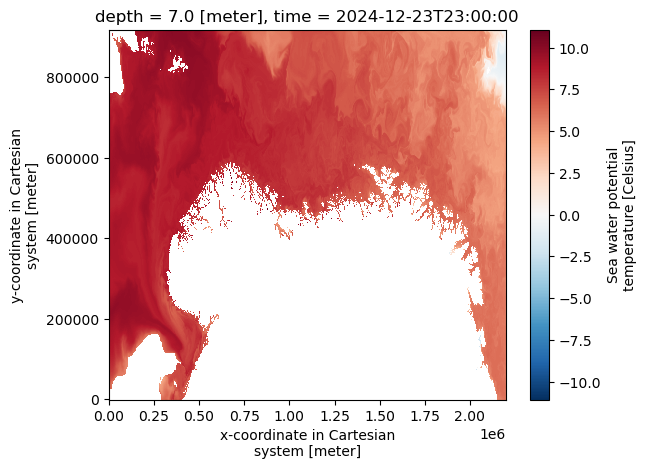

In [19]:
ds.temperature.sel(time='2024-12-23T23:00:00').isel(depth=5).plot()

When using the `.sel` function, the argument has to be exact to what is in the dataset. If not use the argument `method=nearest` as shown below:

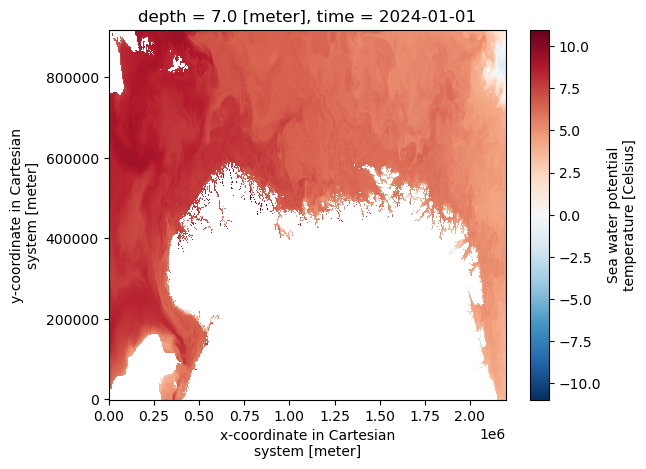

In [20]:
ds.temperature.sel(time='2023-12-23', method='nearest').isel(depth=5).plot() # here I searched for a date which is not in the dataset

Or use one function and specify multiple coordinates. Here we use the function `.isel`to retrieve the temperatures at a given index of Y and a given index of time.

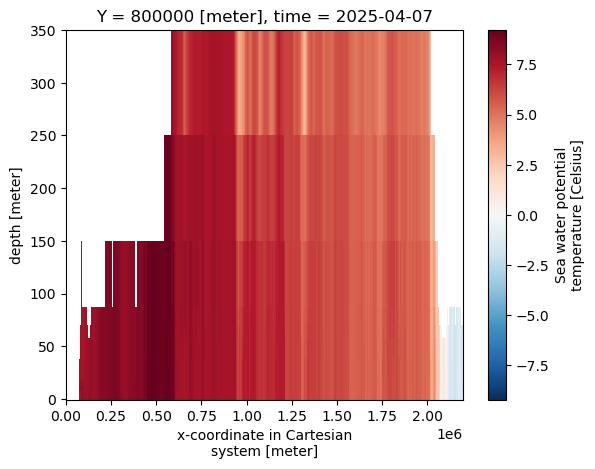

In [21]:
ds.temperature.isel(Y=1000, time=-1).plot()

When we specify `Y=1000` we get a cross section with depth on the y-axis. Xarray plots for the remaining coordinates, meaning the ones you did not specify. 

A more intuitive way of looking at a cross section would be to flip the y-axis:

(350.0, -0.5)

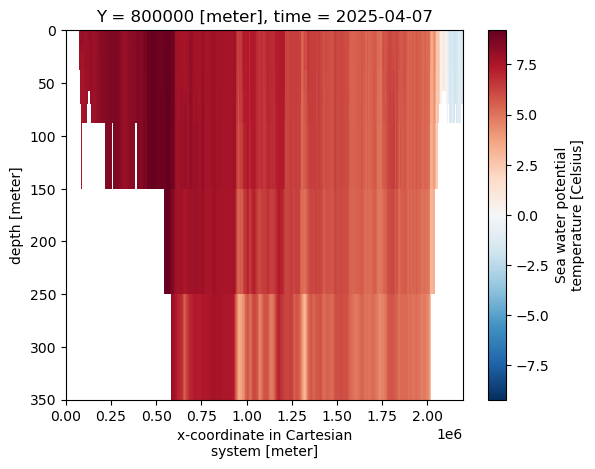

In [22]:
ds.temperature.isel(Y=1000, time=-1).plot()
plt.ylim(plt.ylim()[::-1])  # Revert the vertical axis

The above is a very naive and oversimplified way of plotting a cross section. For more sofisticated ways of plotting vertical sections see the notebook `cross_section.ipynb`.

You may have noticed on the first maps plotted that the x- and y-axis is not very intuitive for a map. To plot the data as given latitudes and longitudes, we need to use map projections and the Python package Cartopy.

In Cartopy, the projection determines what the map will look like while the transformation tells the program which coordinate system your data is in. Our data is in longitude and latitude, so the transformation, indicated by the argument `transform=`is `ccrs.PlateCarree()`. To get an overview of Cartopy and the available projections see: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html .

In [24]:
import cartopy.crs as ccrs

A very simple plot of a map using Cartopy would then be:

In [26]:
ds.temperature

<xarray.DataArray 'temperature' (time: 10967, depth: 15, Y: 1148, X: 2747)>
[518775729780 values with dtype=float32]
Coordinates:
  * X        (X) int32 0 800 1600 2400 3200 ... 2194400 2195200 2196000 2196800
  * Y        (Y) int32 0 800 1600 2400 3200 ... 915200 916000 916800 917600
  * depth    (depth) float64 0.0 1.0 2.0 3.0 5.0 ... 65.0 75.0 100.0 200.0 300.0
  * time     (time) datetime64[ns] 2024-01-01 2024-01-01T01:00:00 ... 2025-04-07
    lon      (Y, X) float64 ...
    lat      (Y, X) float64 ...
Attributes:
    units:          Celsius
    grid:           grid
    location:       face
    field:          temperature, scalar, series
    grid_mapping:   projection_stere
    long_name:      Sea water potential temperature
    standard_name:  sea_water_potential_temperature
    time:           time
    _ChunkSizes:    [   1    1   24 2747]

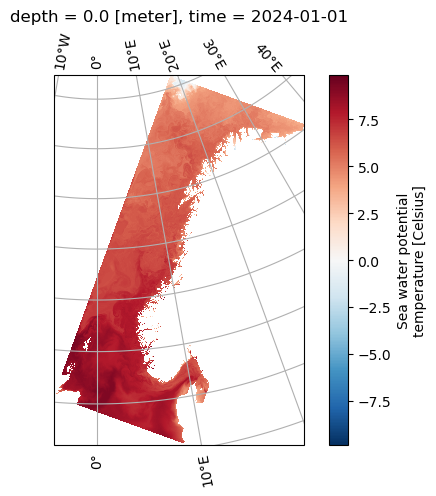

In [31]:
proj = ccrs.NorthPolarStereo()
fig, ax = plt.subplots(subplot_kw={'projection':proj})

# Plotting the temperature for the first timestep and uppermost layer
ds.temperature[0, 0, :, :].plot(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree())

# Add gridlines to see lats/lons
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

For a more extensive example of plotting on maps, see `current_map.ipynb`.